### Importando as bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

### Lendo o dataset

In [2]:
base = pd.read_csv("melb_data.csv")
base.head()

Suburb           Address  Rooms Type        Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h 1,480,000.00      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h 1,035,000.00      S  Biggin   
2  Abbotsford      5 Charles St      3    h 1,465,000.00     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850,000.00     PI  Biggin   
4  Abbotsford       55a Park St      4    h 1,600,000.00     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016      2.50  3,067.00  ...      1.00 1.00    202.00           NaN   
1  4/02/2016      2.50  3,067.00  ...      1.00 0.00    156.00         79.00   
2  4/03/2017      2.50  3,067.00  ...      2.00 0.00    134.00        150.00   
3  4/03/2017      2.50  3,067.00  ...      2.00 1.00     94.00           NaN   
4  4/06/2016      2.50  3,067.00  ...      1.00 2.00    120.00        142.00   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra    -37.80      145.00  Northern Metropolitan   
1   1,900.00        Yarra    -37.81      144.99  Northern Metropolitan   
2   1,900.00        Yarra    -37.81      144.99  Northern Metropolitan   
3        NaN        Yarra    -37.80      145.00  Northern Metropolitan   
4   2,014.00        Yarra    -37.81      144.99  Northern Metropolitan   

  Propertycount  
0      4,019.00  
1      4,019.00  
2      4,019.00  
3      4,019.00  
4      4,019.00  

[5 rows x 21 columns]

### Tratando a base para usar no modelo

In [3]:
# Utilizando o pandas-profile para visualizar o dataset
profile = ProfileReport(base)

In [4]:
# profile
profile.to_file("profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Igor\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\typeset_relations.py:88: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return not series.astype("datetime64").isna().all()
c:\Users\Igor\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\typeset_relations.py:88: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return not series.astype("datetime64").isna().all()
c:\Users\Igor\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\typeset_relations.py:110: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a f

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Retirando as colunas que tiverem uma alta cardinalidade
base = base.drop(["Suburb", "Address", "SellerG", "Date"], axis=1)

In [6]:
# Retirando colunas com mais de 20% de valores nulos
base = base.drop(["BuildingArea", "YearBuilt"], axis=1)

In [7]:
# Visualizando como ficou a base
base.head()

Rooms Type        Price Method  Distance  Postcode  Bedroom2  Bathroom  \
0      2    h 1,480,000.00      S      2.50  3,067.00      2.00      1.00   
1      2    h 1,035,000.00      S      2.50  3,067.00      2.00      1.00   
2      3    h 1,465,000.00     SP      2.50  3,067.00      3.00      2.00   
3      3    h   850,000.00     PI      2.50  3,067.00      3.00      2.00   
4      4    h 1,600,000.00     VB      2.50  3,067.00      3.00      1.00   

   Car  Landsize CouncilArea  Lattitude  Longtitude             Regionname  \
0 1.00    202.00       Yarra     -37.80      145.00  Northern Metropolitan   
1 0.00    156.00       Yarra     -37.81      144.99  Northern Metropolitan   
2 0.00    134.00       Yarra     -37.81      144.99  Northern Metropolitan   
3 1.00     94.00       Yarra     -37.80      145.00  Northern Metropolitan   
4 2.00    120.00       Yarra     -37.81      144.99  Northern Metropolitan   

   Propertycount  
0       4,019.00  
1       4,019.00  
2       4,019.00  
3       4,019.00  
4       4,019.00

C:\Users\Igor\AppData\Local\Temp\ipykernel_10100\1786396247.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr(),annot=True,cmap="YlGnBu")


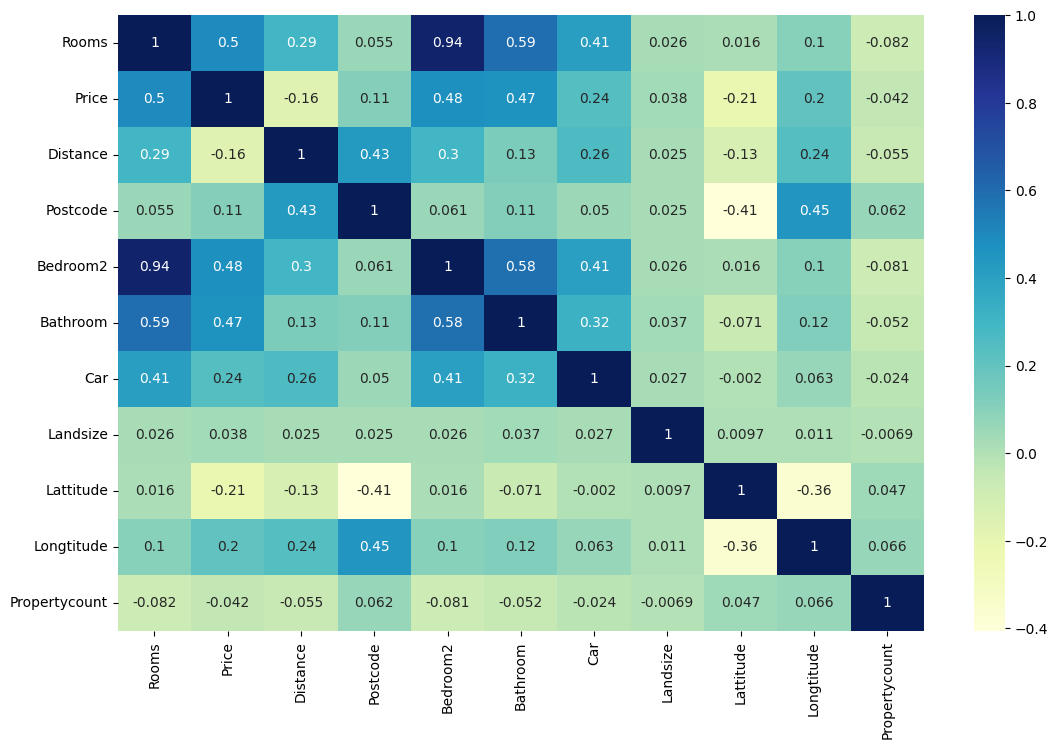

In [8]:
# Mostrando a correlação entre as variáveis
plt.figure(figsize=(13,8))
sns.heatmap(base.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [11]:
# Escolhendo a que tiver correlação mais alta e Landsize pois retiramos o BuildingArea
base1 = base [["Price", "Rooms", "Bathroom", "Bedroom2", "Car", "Landsize"]]

In [12]:
base1.info

<bound method DataFrame.info of              Price  Rooms  Bathroom  Bedroom2  Car  Landsize
0     1,480,000.00      2      1.00      2.00 1.00    202.00
1     1,035,000.00      2      1.00      2.00 0.00    156.00
2     1,465,000.00      3      2.00      3.00 0.00    134.00
3       850,000.00      3      2.00      3.00 1.00     94.00
4     1,600,000.00      4      1.00      3.00 2.00    120.00
...            ...    ...       ...       ...  ...       ...
13575 1,245,000.00      4      2.00      4.00 2.00    652.00
13576 1,031,000.00      3      2.00      3.00 2.00    333.00
13577 1,170,000.00      3      2.00      3.00 4.00    436.00
13578 2,500,000.00      4      1.00      4.00 5.00    866.00
13579 1,285,000.00      4      1.00      4.00 1.00    362.00

[13580 rows x 6 columns]>

In [13]:
# Tratando valores nulos: retirando esses valores
base1 = base1.dropna(axis=0)

In [14]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13518 non-null  float64
 1   Rooms     13518 non-null  int64  
 2   Bathroom  13518 non-null  float64
 3   Bedroom2  13518 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13518 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 739.3 KB


In [15]:
base1.head()

Price  Rooms  Bathroom  Bedroom2  Car  Landsize
0 1,480,000.00      2      1.00      2.00 1.00    202.00
1 1,035,000.00      2      1.00      2.00 0.00    156.00
2 1,465,000.00      3      2.00      3.00 0.00    134.00
3   850,000.00      3      2.00      3.00 1.00     94.00
4 1,600,000.00      4      1.00      3.00 2.00    120.00

### Começando a criar o modelo de Machine Learning

O Primeiro passo vai ser separar entre a nossa variável que queremos prever (Y) e quais vão ser as colunas que vamos usar para essa previsão (X)

In [33]:
Y = base1.Price
X = base1.drop('Price', axis=1)

Em seguida vamos separar a base em treino e teste
* A base de treino vai ser usada para treinar o modelo para que ele faça as previsões.
* A vase de teste vai ser usada para, ao usar o modelo já treinado , verificar o erro da previsão feita pelo modelo em relação aos valores reais.

In [34]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y)

### O proxímo passo é escolher qual modelo iremos usar

### Regressão Linear

In [35]:
# Importando o modelo
from sklearn.linear_model import LinearRegression

# Instanciando
modelo_regressao = LinearRegression()

# Realizando o fit do modelo
modelo_regressao.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_regressao = modelo_regressao.predict(x_teste)

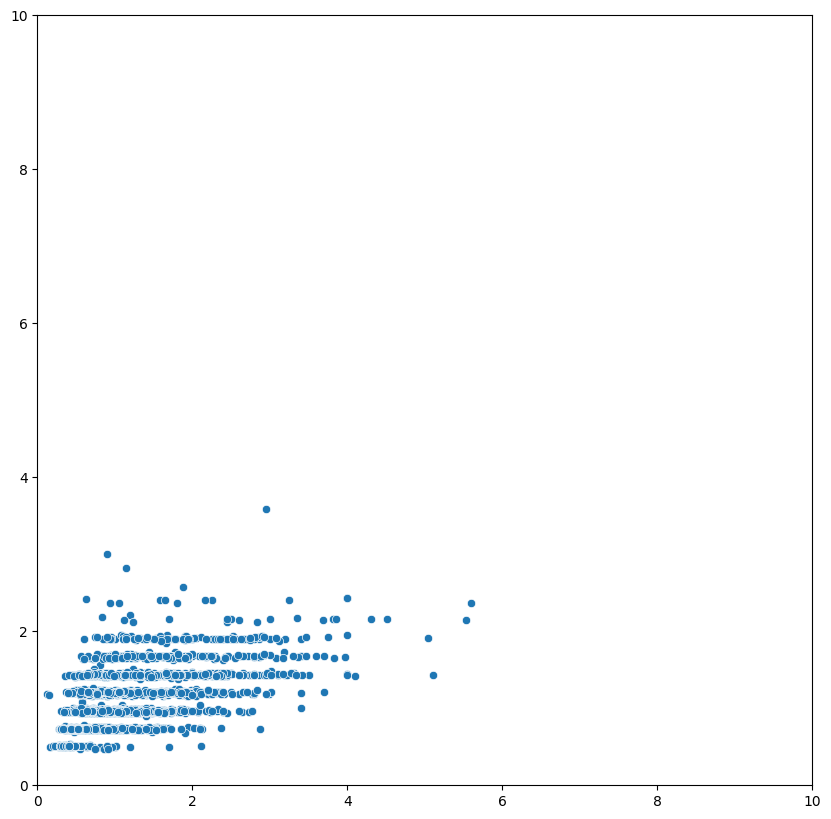

In [36]:
# Visualizando os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=y_regressao/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

In [37]:
# Avaliando o erro quadrático médio
from sklearn.metrics import mean_squared_error
erro_quadratico_regressao = mean_squared_error(y_teste, y_regressao)
print(erro_quadratico_regressao)

265390291308.92892


In [38]:
# Avaliando o R quadrado
from sklearn.metrics import r2_score
r2_regressao = r2_score(y_teste, y_regressao)
print(r2_regressao)

0.3129313044415155


### Regressão Linear: selecionando outras colunas

In [39]:
base2 = base[["Price", "Rooms", "Bathroom", "Bedroom2", "Car", "Longtitude", "Distance", "Landsize", "Postcode", "Propertycount"]]

In [40]:
# Verificando valores nulos e tratando
base2 = base2.dropna(axis=0)
base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          13518 non-null  float64
 1   Rooms          13518 non-null  int64  
 2   Bathroom       13518 non-null  float64
 3   Bedroom2       13518 non-null  float64
 4   Car            13518 non-null  float64
 5   Longtitude     13518 non-null  float64
 6   Distance       13518 non-null  float64
 7   Landsize       13518 non-null  float64
 8   Postcode       13518 non-null  float64
 9   Propertycount  13518 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.1 MB


In [41]:
# Separando a base
Y = base2.Price
X = base2.drop('Price', axis=1)

# Dividindo em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y)

# Fazendo o fit para os novos dados
# Instancioando
modelo_regressao2 = LinearRegression()

# Realizando o fit do modelo
modelo_regressao2.fit(x_treino, y_treino)

# Usando o modelo para prever os dados de teste
y_regressao2 = modelo_regressao2.predict(x_teste)

## Avaliando os erros
# Erro quadrático médio
erro_quadratico_regressao2 = mean_squared_error(y_teste, y_regressao)
print(erro_quadratico_regressao2)

# R quadrado
r2_regressao2 = r2_score(y_teste, y_regressao2)
print(r2_regressao2)


554165548612.3639
0.46515225749088707


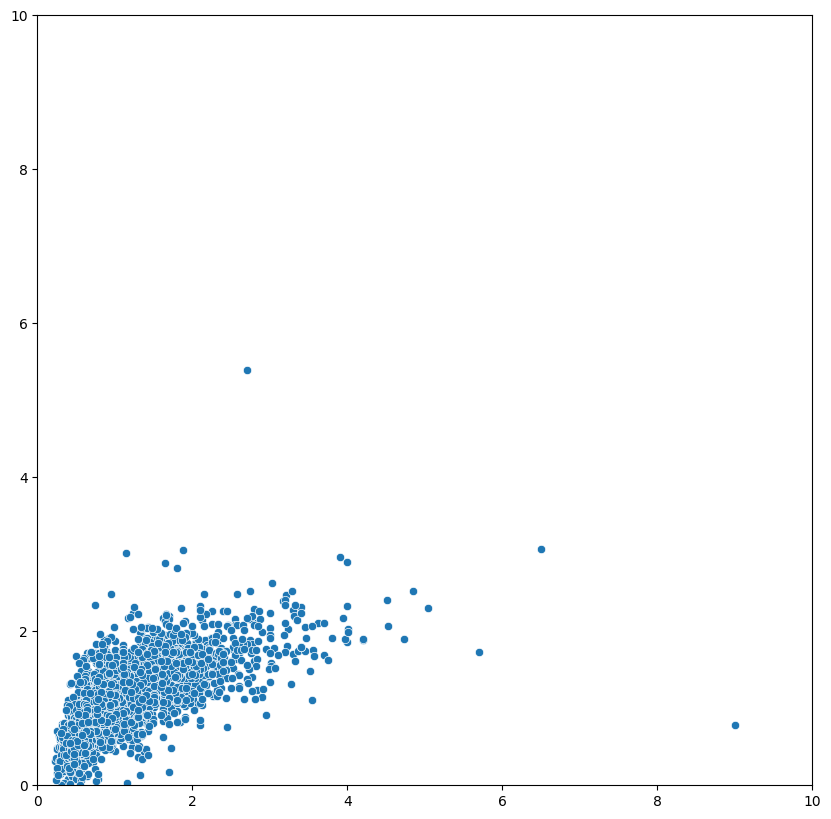

In [43]:
# Visualizando os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000,y=y_regressao2/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

### Árvore de Decisão

In [44]:
# Importando o modelo
from sklearn.tree import DecisionTreeRegressor

# Instanciando
modelo_arvore_decisao = DecisionTreeRegressor()

# Realizando o fit do modelo
modelo_arvore_decisao.fit(x_treino, y_treino)

# Usando o modelo para prever os dados de teste
y_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

In [45]:
## Avaliando os erros
# Erro quadrático médio
erro_quadratico_arvore_decisao = mean_squared_error(y_teste, y_arvore_decisao)
print(erro_quadratico_arvore_decisao)

# R quadrado
r2_arvore_decisao = r2_score(y_teste, y_arvore_decisao)
print(r2_arvore_decisao)

190940982626.23312
0.5533932155450118
